In [149]:
import json
import requests
from openai import OpenAI
import os
import tiktoken
import random
from tqdm import tqdm

In [150]:
GPT_MODEL = "gpt-3.5-turbo"

encoding = tiktoken.encoding_for_model("gpt-3.5-turbo")

In [151]:
client = OpenAI()

In [152]:
def call_model(prompt):
    completion = client.chat.completions.create(model=GPT_MODEL,
            messages=[{'role': 'user', 'content': prompt}])
    return completion.choices[0].message.content

### Step 1. Find classification tasks that are learnable in-context

In [5]:
ques_prefix = """
Here are 3 simple classification rules and example inputs which better explain when the rule is satisfied.
You have to create a composite rule which is a combination of all these 3 rules, and give 7 examples for that rule and write in similar format
Write only Rule, input and label, nothing else

"""

In [6]:
with open("data/data.json","r") as f:
    data = json.loads(f.read())

In [294]:
# the data contains groupings of rules as keys and values being hte rule level tasks

In [295]:
data["Word Pattern and Structure"]

{'Presence of Specific Word': {'example': "The input is labeled as 'True' if it contains the word 'apple'.",
  'inputs': ['Input: I love eating apples. Label: True',
   'Input: Bananas are my favorite. Label: False']},
 'All Caps': {'example': "The input is labeled as 'True' if all words are in uppercase.",
  'inputs': ['Input: THIS IS AN EXAMPLE. Label: True',
   'Input: Mixed case sentence. Label: False']},
 'Consecutive Vowels': {'example': "The input is labeled as 'True' if it contains three consecutive vowels.",
  'inputs': ['Input: The rain poured down. Label: True',
   'Input: A cat on a mat. Label: False']},
 'Repeated Letter': {'example': "The input is labeled as 'True' if it contains a repeated letter.",
  'inputs': ['Input: Success is sweet. Label: True',
   'Input: No repeated letters in this sentence. Label: False']}}

In [341]:
data["Word Pattern and Structure"]['Presence of Specific Word']['example']

"The input is labeled as 'True' if it contains the word 'apple'."

In [343]:
len(all_rules)

45

In [346]:
all_rules = {}

for rule_group in data:
    for sub_rule in data[rule_group]:
        all_rules[data[rule_group][sub_rule]['example']] = rule_group ## for reference

In [7]:
def get_n_rand_keys(dict_keys,n):
    return list(random.sample(list(dict_keys), n))

In [8]:
def pick_rand_sample(data):
    
    examples = []
    
    rules_groups = get_n_rand_keys(data,3)
    
    for rule_group in rules_groups:
        rule = get_n_rand_keys(data[rule_group],1)[0]
        example = "Rule: "+data[rule_group][rule]["example"]+"\n"+"\n".join(data[rule_group][rule]["inputs"])
        examples.append(example)
    return examples   

In [9]:
def get_question_seed():
    ques_suffix = pick_rand_sample(data)
    return(ques_prefix+"\n\n".join(ques_suffix))

In [10]:
def num_tokens_from_string(string) -> int:
    num_tokens = len(encoding.encode(string))
    return num_tokens

In [11]:
data_list = [] 

In [12]:
n_samples = 100

In [13]:
token_count = {"input":0, "output":0}

In [15]:
def get_tok_cost(token_count):
    return (0.001*token_count["input"]/1000)+(0.002*token_count["output"]/1000)

In [17]:
for idx in tqdm(range(n_samples)):
    ques = get_question_seed()
    token_count["input"] += num_tokens_from_string(ques)
    sample = call_model(ques)
    data_list.append(sample)
    token_count["output"] += num_tokens_from_string(ques)
    print("approx cost so far: {:.3f}".format(round(get_tok_cost(token_count), 3)))

  1%|▋                                                                   | 1/100 [00:04<06:55,  4.19s/it]

approx cost so far: 0.001


  2%|█▎                                                                  | 2/100 [00:07<05:52,  3.60s/it]

approx cost so far: 0.002


  3%|██                                                                  | 3/100 [00:10<05:34,  3.45s/it]

approx cost so far: 0.002


  4%|██▋                                                                 | 4/100 [00:15<06:14,  3.91s/it]

approx cost so far: 0.003


  5%|███▍                                                                | 5/100 [00:17<05:28,  3.46s/it]

approx cost so far: 0.003


  6%|████                                                                | 6/100 [00:22<05:51,  3.74s/it]

approx cost so far: 0.004


  7%|████▊                                                               | 7/100 [00:25<05:30,  3.56s/it]

approx cost so far: 0.004


  8%|█████▍                                                              | 8/100 [00:28<05:01,  3.27s/it]

approx cost so far: 0.005


  9%|██████                                                              | 9/100 [00:31<04:55,  3.24s/it]

approx cost so far: 0.006


 10%|██████▋                                                            | 10/100 [00:34<05:04,  3.38s/it]

approx cost so far: 0.006


 11%|███████▎                                                           | 11/100 [00:37<04:49,  3.25s/it]

approx cost so far: 0.007


 12%|████████                                                           | 12/100 [00:40<04:36,  3.14s/it]

approx cost so far: 0.007


 13%|████████▋                                                          | 13/100 [00:43<04:25,  3.05s/it]

approx cost so far: 0.008


 14%|█████████▍                                                         | 14/100 [00:47<04:52,  3.40s/it]

approx cost so far: 0.008


 15%|██████████                                                         | 15/100 [00:51<04:45,  3.36s/it]

approx cost so far: 0.009


 16%|██████████▋                                                        | 16/100 [00:54<04:48,  3.43s/it]

approx cost so far: 0.009


 17%|███████████▍                                                       | 17/100 [00:59<05:22,  3.88s/it]

approx cost so far: 0.010


 18%|████████████                                                       | 18/100 [01:03<05:15,  3.85s/it]

approx cost so far: 0.011


 19%|████████████▋                                                      | 19/100 [01:08<05:42,  4.23s/it]

approx cost so far: 0.011


 20%|█████████████▍                                                     | 20/100 [01:11<05:20,  4.01s/it]

approx cost so far: 0.012


 21%|██████████████                                                     | 21/100 [01:15<05:11,  3.94s/it]

approx cost so far: 0.012


 22%|██████████████▋                                                    | 22/100 [01:18<04:42,  3.62s/it]

approx cost so far: 0.013


 23%|███████████████▍                                                   | 23/100 [01:22<04:35,  3.58s/it]

approx cost so far: 0.013


 24%|████████████████                                                   | 24/100 [01:25<04:29,  3.55s/it]

approx cost so far: 0.014


 25%|████████████████▊                                                  | 25/100 [01:28<04:06,  3.28s/it]

approx cost so far: 0.014


 26%|█████████████████▍                                                 | 26/100 [01:31<04:05,  3.31s/it]

approx cost so far: 0.015


 27%|██████████████████                                                 | 27/100 [01:36<04:27,  3.67s/it]

approx cost so far: 0.016


 28%|██████████████████▊                                                | 28/100 [01:39<04:09,  3.46s/it]

approx cost so far: 0.016


 29%|███████████████████▍                                               | 29/100 [01:42<03:59,  3.38s/it]

approx cost so far: 0.017


 30%|████████████████████                                               | 30/100 [01:45<03:54,  3.34s/it]

approx cost so far: 0.017


 31%|████████████████████▊                                              | 31/100 [01:48<03:38,  3.17s/it]

approx cost so far: 0.018


 32%|█████████████████████▍                                             | 32/100 [01:54<04:42,  4.15s/it]

approx cost so far: 0.018


 33%|██████████████████████                                             | 33/100 [01:58<04:26,  3.98s/it]

approx cost so far: 0.019


 34%|██████████████████████▊                                            | 34/100 [02:01<03:58,  3.62s/it]

approx cost so far: 0.019


 35%|███████████████████████▍                                           | 35/100 [02:04<03:50,  3.55s/it]

approx cost so far: 0.020


 36%|████████████████████████                                           | 36/100 [02:08<03:49,  3.59s/it]

approx cost so far: 0.021


 37%|████████████████████████▊                                          | 37/100 [02:11<03:41,  3.52s/it]

approx cost so far: 0.021


 38%|█████████████████████████▍                                         | 38/100 [02:15<03:46,  3.66s/it]

approx cost so far: 0.022


 39%|██████████████████████████▏                                        | 39/100 [02:18<03:27,  3.40s/it]

approx cost so far: 0.022


 40%|██████████████████████████▊                                        | 40/100 [02:21<03:20,  3.34s/it]

approx cost so far: 0.023


 41%|███████████████████████████▍                                       | 41/100 [02:24<03:06,  3.16s/it]

approx cost so far: 0.023


 42%|████████████████████████████▏                                      | 42/100 [02:27<03:06,  3.21s/it]

approx cost so far: 0.024


 43%|████████████████████████████▊                                      | 43/100 [02:30<02:52,  3.03s/it]

approx cost so far: 0.025


 44%|█████████████████████████████▍                                     | 44/100 [02:33<02:55,  3.13s/it]

approx cost so far: 0.025


 45%|██████████████████████████████▏                                    | 45/100 [02:36<02:51,  3.12s/it]

approx cost so far: 0.026


 46%|██████████████████████████████▊                                    | 46/100 [02:39<02:45,  3.07s/it]

approx cost so far: 0.026


 47%|███████████████████████████████▍                                   | 47/100 [02:43<02:58,  3.38s/it]

approx cost so far: 0.027


 48%|████████████████████████████████▏                                  | 48/100 [02:47<03:01,  3.49s/it]

approx cost so far: 0.027


 49%|████████████████████████████████▊                                  | 49/100 [02:50<02:49,  3.32s/it]

approx cost so far: 0.028


 50%|█████████████████████████████████▌                                 | 50/100 [02:53<02:47,  3.35s/it]

approx cost so far: 0.028


 51%|██████████████████████████████████▏                                | 51/100 [02:57<02:49,  3.47s/it]

approx cost so far: 0.029


 52%|██████████████████████████████████▊                                | 52/100 [03:01<03:00,  3.76s/it]

approx cost so far: 0.030


 53%|███████████████████████████████████▌                               | 53/100 [03:06<03:04,  3.92s/it]

approx cost so far: 0.030


 54%|████████████████████████████████████▏                              | 54/100 [03:10<03:02,  3.96s/it]

approx cost so far: 0.031


 55%|████████████████████████████████████▊                              | 55/100 [03:13<02:47,  3.73s/it]

approx cost so far: 0.031


 56%|█████████████████████████████████████▌                             | 56/100 [03:16<02:36,  3.57s/it]

approx cost so far: 0.032


 57%|██████████████████████████████████████▏                            | 57/100 [03:19<02:29,  3.48s/it]

approx cost so far: 0.032


 58%|██████████████████████████████████████▊                            | 58/100 [03:24<02:35,  3.69s/it]

approx cost so far: 0.033


 59%|███████████████████████████████████████▌                           | 59/100 [03:27<02:27,  3.60s/it]

approx cost so far: 0.033


 60%|████████████████████████████████████████▏                          | 60/100 [03:30<02:12,  3.32s/it]

approx cost so far: 0.034


 61%|████████████████████████████████████████▊                          | 61/100 [03:33<02:04,  3.18s/it]

approx cost so far: 0.035


 62%|█████████████████████████████████████████▌                         | 62/100 [03:36<02:03,  3.24s/it]

approx cost so far: 0.035


 63%|██████████████████████████████████████████▏                        | 63/100 [03:40<02:11,  3.56s/it]

approx cost so far: 0.036


 64%|██████████████████████████████████████████▉                        | 64/100 [03:45<02:19,  3.87s/it]

approx cost so far: 0.036


 65%|███████████████████████████████████████████▌                       | 65/100 [03:48<02:03,  3.54s/it]

approx cost so far: 0.037


 66%|████████████████████████████████████████████▏                      | 66/100 [03:51<01:54,  3.37s/it]

approx cost so far: 0.037


 67%|████████████████████████████████████████████▉                      | 67/100 [03:54<01:47,  3.26s/it]

approx cost so far: 0.038


 68%|█████████████████████████████████████████████▌                     | 68/100 [03:56<01:40,  3.13s/it]

approx cost so far: 0.038


 69%|██████████████████████████████████████████████▏                    | 69/100 [04:00<01:42,  3.31s/it]

approx cost so far: 0.039


 70%|██████████████████████████████████████████████▉                    | 70/100 [04:03<01:36,  3.21s/it]

approx cost so far: 0.040


 71%|███████████████████████████████████████████████▌                   | 71/100 [04:06<01:28,  3.06s/it]

approx cost so far: 0.040


 72%|████████████████████████████████████████████████▏                  | 72/100 [04:09<01:23,  2.98s/it]

approx cost so far: 0.041


 73%|████████████████████████████████████████████████▉                  | 73/100 [04:12<01:19,  2.95s/it]

approx cost so far: 0.041


 74%|█████████████████████████████████████████████████▌                 | 74/100 [04:14<01:15,  2.92s/it]

approx cost so far: 0.042


 75%|██████████████████████████████████████████████████▎                | 75/100 [04:18<01:14,  3.00s/it]

approx cost so far: 0.042


 76%|██████████████████████████████████████████████████▉                | 76/100 [04:21<01:14,  3.11s/it]

approx cost so far: 0.043


 77%|███████████████████████████████████████████████████▌               | 77/100 [04:24<01:10,  3.07s/it]

approx cost so far: 0.043


 78%|████████████████████████████████████████████████████▎              | 78/100 [04:27<01:09,  3.16s/it]

approx cost so far: 0.044


 79%|████████████████████████████████████████████████████▉              | 79/100 [04:31<01:09,  3.29s/it]

approx cost so far: 0.045


 80%|█████████████████████████████████████████████████████▌             | 80/100 [04:35<01:08,  3.41s/it]

approx cost so far: 0.045


 81%|██████████████████████████████████████████████████████▎            | 81/100 [04:38<01:04,  3.40s/it]

approx cost so far: 0.046


 82%|██████████████████████████████████████████████████████▉            | 82/100 [04:41<00:58,  3.24s/it]

approx cost so far: 0.046


 83%|███████████████████████████████████████████████████████▌           | 83/100 [04:46<01:06,  3.89s/it]

approx cost so far: 0.047


 84%|████████████████████████████████████████████████████████▎          | 84/100 [04:50<01:00,  3.77s/it]

approx cost so far: 0.047


 85%|████████████████████████████████████████████████████████▉          | 85/100 [04:53<00:55,  3.68s/it]

approx cost so far: 0.048


 86%|█████████████████████████████████████████████████████████▌         | 86/100 [04:57<00:50,  3.62s/it]

approx cost so far: 0.048


 87%|██████████████████████████████████████████████████████████▎        | 87/100 [05:01<00:50,  3.89s/it]

approx cost so far: 0.049


 88%|██████████████████████████████████████████████████████████▉        | 88/100 [05:05<00:44,  3.74s/it]

approx cost so far: 0.050


 89%|███████████████████████████████████████████████████████████▋       | 89/100 [05:08<00:39,  3.63s/it]

approx cost so far: 0.050


 90%|████████████████████████████████████████████████████████████▎      | 90/100 [05:11<00:34,  3.43s/it]

approx cost so far: 0.051


 91%|████████████████████████████████████████████████████████████▉      | 91/100 [05:14<00:29,  3.29s/it]

approx cost so far: 0.051


 92%|█████████████████████████████████████████████████████████████▋     | 92/100 [05:17<00:25,  3.20s/it]

approx cost so far: 0.052


 93%|██████████████████████████████████████████████████████████████▎    | 93/100 [05:20<00:22,  3.21s/it]

approx cost so far: 0.052


 94%|██████████████████████████████████████████████████████████████▉    | 94/100 [05:23<00:19,  3.21s/it]

approx cost so far: 0.053


 95%|███████████████████████████████████████████████████████████████▋   | 95/100 [05:26<00:15,  3.14s/it]

approx cost so far: 0.053


 96%|████████████████████████████████████████████████████████████████▎  | 96/100 [05:30<00:13,  3.42s/it]

approx cost so far: 0.054


 97%|████████████████████████████████████████████████████████████████▉  | 97/100 [05:34<00:10,  3.38s/it]

approx cost so far: 0.055


 98%|█████████████████████████████████████████████████████████████████▋ | 98/100 [05:39<00:08,  4.03s/it]

approx cost so far: 0.055


 99%|██████████████████████████████████████████████████████████████████▎| 99/100 [05:43<00:03,  3.90s/it]

approx cost so far: 0.056


100%|██████████████████████████████████████████████████████████████████| 100/100 [05:45<00:00,  3.46s/it]

approx cost so far: 0.056


In [58]:
with open("data/composite_data.txt","w") as f:
    for line in data_list:
        f.write("\n"+line+"\n")

In [81]:
with open("data/composite_data.txt","r") as f: ## reading data after manual cleaning
    data_list = f.read().split("\n\n")

In [87]:
assert len(data_list) ==n_samples

In [84]:
data_list[0].split("\n")[0].split(": ")[1]

"The input is labeled as 'True' if it contains a smiley face, the number of words is odd, and it reads the same backward as forward."

In [103]:
generated_data = []

for sample in tqdm(data_list):
    

    lines = sample.split("\n")
    if lines[-1] == '': lines = lines[:-1]
    rule = lines[0].split(": ")[1]
    
    x = lines[-1].split("Input: ")[1].split(" Label")[0]
    y = lines[-1].split("Input: ")[1].split("Label: ")[1]
    
    generated_data.append({"rule":rule,"examples":lines[1:-1], "x":x,"y":y})

100%|██████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 172960.99it/s]


In [162]:
template = """
Based on these examples
{examples}

predict the label for this
{input} Label: 
"""

In [156]:
predictions = []
for sample in tqdm(generated_data):
    examples = sample["examples"]
    input_to_predict = sample["x"]
    prompt = template.format(examples='\n'.join(examples), input=input_to_predict)
    resp = call_model(prompt)
    predictions.append([sample["y"],resp])

100%|██████████████████████████████████████████████████████████████████| 100/100 [02:23<00:00,  1.44s/it]


In [160]:
print(predictions[:20])

[['False', 'False'], ['True', 'True'], ['True', 'False'], ['True', 'True'], ['False', 'False'], ['False', 'True'], ['True', 'True'], ['True', 'True'], ['True', 'True'], ['False', 'False'], ['True', 'True'], ['True', 'True'], ['False', 'False'], ['False', 'False'], ['True', 'True.'], ['True', 'True'], ['True', 'True'], ['False', 'False'], ['False', 'False'], ['True', 'Based on the examples provided, the predicted label for the input "Hurray! The score is 1.5e9" would be True.']]


In [158]:
def get_acc(preds):
    score = 0.0
    results = []
    for pred in preds:
        if pred[0].lower() in pred[1].lower(): # approximate string check!
            score+=1.0
        else:
            score+=0.0
    return (score*100/len(preds))

In [244]:
def get_acc(preds):
    score = []
    results = []
    for pred in preds:
        if pred[0].lower() in pred[1].lower(): # approximate string check!
            score.append(1.0)
        else:
            score.append(0.0)
    return (sum(score)*100/len(preds),score)

In [250]:
accuracy, results = get_acc(predictions) # results will be used later

In [436]:
data['Word Count']['Even Word Count']

{'example': "The input is labeled as 'True' if the number of words is even.",
 'inputs': ['Input: The cat is on the mat. Label: True',
  'Input: A lone tree stands tall. Label: False'],
 "The input is labeled as 'True' if it contains an acronym.": 'Word Count'}

In [434]:
generated_data[0]

{'rule': "The input is labeled as 'True' if it contains a smiley face, the number of words is odd, and it reads the same backward as forward.",
 'examples': ["Input: I'm feeling great today! :) Label: True",
  'Input: The weather is sunny. Label: False',
  'Input: This event made me so sad. :( Label: False',
  'Input: Wow, what a wonderful surprise! :) Label: True',
  'Input: Even words, but a smiley face :)! Label: False',
  'Input: Radar level: toot Label: True'],
 'x': 'I forgot to wear my glasses.',
 'y': 'False'}

In [426]:
data_v2  = data

In [429]:
data_v2['Word Pattern and Structure']['Presence of Specific Word'] = 

{'example': "The input is labeled as 'True' if it contains the word 'apple'.",
 'inputs': ['Input: I love eating apples. Label: True',
  'Input: Bananas are my favorite. Label: False'],
 "The input is labeled as 'True' if it contains an acronym.": 'Word Pattern and Structure'}

In [269]:
print("Accuracy of label prediction:", f"{round(accuracy, 2)}%")
# TODO: get the accuracy above 90%

Accuracy of label prediction: 79.0%


### Step 2. Test the LLM’s ability to articulate the rules

In [220]:
rule_prediction_template = """
For the following examples 
{examples}

predict the rule that could be used to classify the examples as True or False

Option A: {ruleA} 

Option B: {ruleB} 

Option C: {ruleC} 

Option D: {ruleD}

respond with a single alphabet of the option and nothing else, only single alphabet
"""

In [221]:
# randomly pick 3 elements which are not equal to the current element?
def pick_random_elements(lst, excluded_element):
    # Filter elements that are not equal to the excluded element
    eligible_elements = [ele for ele in lst if ele != excluded_element]

    # Check if there are at least 3 eligible elements
    if len(eligible_elements) >= 3:
        # Randomly pick 3 elements from the eligible elements
        random_elements = random.sample(eligible_elements, 3)
        return random_elements
    else:
        print("Not enough eligible elements in the list.")
        return None

In [225]:
rule_predictions = []
for sample in tqdm(generated_data):
    
    examples = sample["examples"]
    
    input_to_predict = sample["x"]
    
    
    random_samples = pick_random_elements(generated_data,sample)
    rules = [item['rule'] for item in random_samples]

    rules.append(sample["rule"])
    random.shuffle(rules)
    rules_dict = dict(zip(["A","B","C","D"], rules))
        
    prompt = rule_prediction_template.format(
    examples='\n'.join(examples),
    ruleA=rules_dict['A'],
    ruleB=rules_dict['B'],
    ruleC=rules_dict['C'],
    ruleD=rules_dict['D'])
    
    token_count["input"] += num_tokens_from_string(prompt)

    resp = call_model(prompt)
    
    token_count["output"] += num_tokens_from_string(resp)
    print("approx cost so far: {:.3f}".format(round(get_tok_cost(token_count), 3)))
    rule_predictions.append([sample["rule"],resp,rules_dict])

  1%|▋                                                                   | 1/100 [00:00<00:51,  1.91it/s]

approx cost so far: 0.132


  2%|█▎                                                                  | 2/100 [00:01<01:08,  1.44it/s]

approx cost so far: 0.133


  3%|██                                                                  | 3/100 [00:02<01:12,  1.33it/s]

approx cost so far: 0.133


  4%|██▋                                                                 | 4/100 [00:02<01:10,  1.35it/s]

approx cost so far: 0.133


  5%|███▍                                                                | 5/100 [00:03<01:05,  1.44it/s]

approx cost so far: 0.133


  6%|████                                                                | 6/100 [00:04<01:02,  1.50it/s]

approx cost so far: 0.134


  7%|████▊                                                               | 7/100 [00:04<01:06,  1.40it/s]

approx cost so far: 0.134


  8%|█████▍                                                              | 8/100 [00:05<01:02,  1.46it/s]

approx cost so far: 0.134


  9%|██████                                                              | 9/100 [00:05<00:54,  1.67it/s]

approx cost so far: 0.135


 10%|██████▋                                                            | 10/100 [00:06<00:59,  1.50it/s]

approx cost so far: 0.135


 11%|███████▎                                                           | 11/100 [00:07<00:59,  1.51it/s]

approx cost so far: 0.135


 12%|████████                                                           | 12/100 [00:08<01:01,  1.43it/s]

approx cost so far: 0.135


 13%|████████▋                                                          | 13/100 [00:08<01:00,  1.43it/s]

approx cost so far: 0.136


 14%|█████████▍                                                         | 14/100 [00:09<01:03,  1.35it/s]

approx cost so far: 0.136


 15%|██████████                                                         | 15/100 [00:10<00:59,  1.42it/s]

approx cost so far: 0.136


 16%|██████████▋                                                        | 16/100 [00:10<00:56,  1.48it/s]

approx cost so far: 0.136


 17%|███████████▍                                                       | 17/100 [00:11<00:59,  1.39it/s]

approx cost so far: 0.137


 18%|████████████                                                       | 18/100 [00:12<00:56,  1.45it/s]

approx cost so far: 0.137


 19%|████████████▋                                                      | 19/100 [00:13<00:54,  1.49it/s]

approx cost so far: 0.137


 20%|█████████████▍                                                     | 20/100 [00:13<00:51,  1.54it/s]

approx cost so far: 0.137


 21%|██████████████                                                     | 21/100 [00:14<00:55,  1.43it/s]

approx cost so far: 0.138


 22%|██████████████▋                                                    | 22/100 [00:14<00:47,  1.64it/s]

approx cost so far: 0.138


 23%|███████████████▍                                                   | 23/100 [00:15<00:52,  1.48it/s]

approx cost so far: 0.138


 24%|████████████████                                                   | 24/100 [00:16<00:50,  1.52it/s]

approx cost so far: 0.139


 25%|████████████████▊                                                  | 25/100 [00:16<00:48,  1.53it/s]

approx cost so far: 0.139


 26%|█████████████████▍                                                 | 26/100 [00:17<00:49,  1.51it/s]

approx cost so far: 0.139


 27%|██████████████████                                                 | 27/100 [00:18<00:42,  1.70it/s]

approx cost so far: 0.139


 28%|██████████████████▊                                                | 28/100 [00:18<00:42,  1.71it/s]

approx cost so far: 0.140


 29%|███████████████████▍                                               | 29/100 [00:19<00:44,  1.58it/s]

approx cost so far: 0.140


 30%|████████████████████                                               | 30/100 [00:20<00:48,  1.45it/s]

approx cost so far: 0.140


 31%|████████████████████▊                                              | 31/100 [00:20<00:49,  1.40it/s]

approx cost so far: 0.140


 32%|█████████████████████▍                                             | 32/100 [00:21<00:47,  1.43it/s]

approx cost so far: 0.141


 33%|██████████████████████                                             | 33/100 [00:22<00:45,  1.47it/s]

approx cost so far: 0.141


 34%|██████████████████████▊                                            | 34/100 [00:22<00:45,  1.46it/s]

approx cost so far: 0.141


 35%|███████████████████████▍                                           | 35/100 [00:23<00:47,  1.38it/s]

approx cost so far: 0.141


 36%|████████████████████████                                           | 36/100 [00:24<00:40,  1.59it/s]

approx cost so far: 0.142


 37%|████████████████████████▊                                          | 37/100 [00:24<00:40,  1.57it/s]

approx cost so far: 0.142


 38%|█████████████████████████▍                                         | 38/100 [00:25<00:35,  1.77it/s]

approx cost so far: 0.142


 39%|██████████████████████████▏                                        | 39/100 [00:26<00:38,  1.58it/s]

approx cost so far: 0.142


 40%|██████████████████████████▊                                        | 40/100 [00:26<00:40,  1.47it/s]

approx cost so far: 0.143


 41%|███████████████████████████▍                                       | 41/100 [00:27<00:41,  1.43it/s]

approx cost so far: 0.143


 42%|████████████████████████████▏                                      | 42/100 [00:28<00:42,  1.36it/s]

approx cost so far: 0.143


 43%|████████████████████████████▊                                      | 43/100 [00:29<00:43,  1.32it/s]

approx cost so far: 0.143


 44%|█████████████████████████████▍                                     | 44/100 [00:29<00:40,  1.40it/s]

approx cost so far: 0.144


 45%|██████████████████████████████▏                                    | 45/100 [00:30<00:39,  1.40it/s]

approx cost so far: 0.144


 46%|██████████████████████████████▊                                    | 46/100 [00:30<00:33,  1.60it/s]

approx cost so far: 0.144


 47%|███████████████████████████████▍                                   | 47/100 [00:32<00:42,  1.24it/s]

approx cost so far: 0.144


 48%|████████████████████████████████▏                                  | 48/100 [00:32<00:38,  1.34it/s]

approx cost so far: 0.145


 49%|████████████████████████████████▊                                  | 49/100 [00:33<00:39,  1.30it/s]

approx cost so far: 0.145


 50%|█████████████████████████████████▌                                 | 50/100 [00:34<00:36,  1.38it/s]

approx cost so far: 0.145


 51%|██████████████████████████████████▏                                | 51/100 [00:34<00:34,  1.41it/s]

approx cost so far: 0.146


 52%|██████████████████████████████████▊                                | 52/100 [00:35<00:34,  1.38it/s]

approx cost so far: 0.146


 53%|███████████████████████████████████▌                               | 53/100 [00:36<00:32,  1.45it/s]

approx cost so far: 0.146


 54%|████████████████████████████████████▏                              | 54/100 [00:37<00:42,  1.09it/s]

approx cost so far: 0.146


 55%|████████████████████████████████████▊                              | 55/100 [00:38<00:35,  1.26it/s]

approx cost so far: 0.147


 56%|█████████████████████████████████████▌                             | 56/100 [00:38<00:32,  1.35it/s]

approx cost so far: 0.147


 57%|██████████████████████████████████████▏                            | 57/100 [00:39<00:32,  1.31it/s]

approx cost so far: 0.147


 58%|██████████████████████████████████████▊                            | 58/100 [00:40<00:30,  1.38it/s]

approx cost so far: 0.148


 59%|███████████████████████████████████████▌                           | 59/100 [00:40<00:28,  1.44it/s]

approx cost so far: 0.148


 60%|████████████████████████████████████████▏                          | 60/100 [00:41<00:28,  1.38it/s]

approx cost so far: 0.148


 61%|████████████████████████████████████████▊                          | 61/100 [00:42<00:26,  1.45it/s]

approx cost so far: 0.148


 62%|█████████████████████████████████████████▌                         | 62/100 [00:42<00:25,  1.49it/s]

approx cost so far: 0.149


 63%|██████████████████████████████████████████▏                        | 63/100 [00:43<00:24,  1.51it/s]

approx cost so far: 0.149


 64%|██████████████████████████████████████████▉                        | 64/100 [00:44<00:25,  1.43it/s]

approx cost so far: 0.149


 65%|███████████████████████████████████████████▌                       | 65/100 [00:44<00:23,  1.49it/s]

approx cost so far: 0.149


 66%|████████████████████████████████████████████▏                      | 66/100 [00:45<00:23,  1.46it/s]

approx cost so far: 0.150


 67%|████████████████████████████████████████████▉                      | 67/100 [00:46<00:21,  1.50it/s]

approx cost so far: 0.150


 68%|█████████████████████████████████████████████▌                     | 68/100 [00:46<00:20,  1.54it/s]

approx cost so far: 0.150


 69%|██████████████████████████████████████████████▏                    | 69/100 [00:47<00:21,  1.43it/s]

approx cost so far: 0.150


 70%|██████████████████████████████████████████████▉                    | 70/100 [00:48<00:21,  1.42it/s]

approx cost so far: 0.151


 71%|███████████████████████████████████████████████▌                   | 71/100 [00:49<00:21,  1.35it/s]

approx cost so far: 0.151


 72%|████████████████████████████████████████████████▏                  | 72/100 [00:49<00:20,  1.36it/s]

approx cost so far: 0.151


 73%|████████████████████████████████████████████████▉                  | 73/100 [00:50<00:20,  1.32it/s]

approx cost so far: 0.151


 74%|█████████████████████████████████████████████████▌                 | 74/100 [00:51<00:18,  1.39it/s]

approx cost so far: 0.152


 75%|██████████████████████████████████████████████████▎                | 75/100 [00:52<00:17,  1.46it/s]

approx cost so far: 0.152


 76%|██████████████████████████████████████████████████▉                | 76/100 [00:52<00:15,  1.51it/s]

approx cost so far: 0.152


 77%|███████████████████████████████████████████████████▌               | 77/100 [00:53<00:16,  1.43it/s]

approx cost so far: 0.152


 78%|████████████████████████████████████████████████████▎              | 78/100 [00:53<00:14,  1.53it/s]

approx cost so far: 0.153


 79%|████████████████████████████████████████████████████▉              | 79/100 [00:54<00:14,  1.42it/s]

approx cost so far: 0.153


 80%|█████████████████████████████████████████████████████▌             | 80/100 [00:55<00:14,  1.42it/s]

approx cost so far: 0.153


 81%|██████████████████████████████████████████████████████▎            | 81/100 [00:56<00:14,  1.35it/s]

approx cost so far: 0.153


 82%|██████████████████████████████████████████████████████▉            | 82/100 [00:57<00:13,  1.36it/s]

approx cost so far: 0.154


 83%|███████████████████████████████████████████████████████▌           | 83/100 [00:57<00:12,  1.41it/s]

approx cost so far: 0.154


 84%|████████████████████████████████████████████████████████▎          | 84/100 [00:58<00:11,  1.37it/s]

approx cost so far: 0.154


 85%|████████████████████████████████████████████████████████▉          | 85/100 [00:59<00:11,  1.32it/s]

approx cost so far: 0.155


 86%|█████████████████████████████████████████████████████████▌         | 86/100 [00:59<00:09,  1.46it/s]

approx cost so far: 0.155


 87%|██████████████████████████████████████████████████████████▎        | 87/100 [01:00<00:09,  1.44it/s]

approx cost so far: 0.155


 88%|██████████████████████████████████████████████████████████▉        | 88/100 [01:01<00:10,  1.09it/s]

approx cost so far: 0.155


 89%|███████████████████████████████████████████████████████████▋       | 89/100 [01:02<00:09,  1.20it/s]

approx cost so far: 0.156


 90%|████████████████████████████████████████████████████████████▎      | 90/100 [01:03<00:07,  1.28it/s]

approx cost so far: 0.156


 91%|████████████████████████████████████████████████████████████▉      | 91/100 [01:03<00:06,  1.41it/s]

approx cost so far: 0.156


 92%|█████████████████████████████████████████████████████████████▋     | 92/100 [01:04<00:05,  1.40it/s]

approx cost so far: 0.156


 93%|██████████████████████████████████████████████████████████████▎    | 93/100 [01:05<00:05,  1.34it/s]

approx cost so far: 0.157


 94%|██████████████████████████████████████████████████████████████▉    | 94/100 [01:05<00:04,  1.41it/s]

approx cost so far: 0.157


 95%|███████████████████████████████████████████████████████████████▋   | 95/100 [01:06<00:03,  1.48it/s]

approx cost so far: 0.157


 96%|████████████████████████████████████████████████████████████████▎  | 96/100 [01:06<00:02,  1.66it/s]

approx cost so far: 0.157


 97%|████████████████████████████████████████████████████████████████▉  | 97/100 [01:07<00:01,  1.83it/s]

approx cost so far: 0.158


 98%|█████████████████████████████████████████████████████████████████▋ | 98/100 [01:08<00:01,  1.70it/s]

approx cost so far: 0.158


 99%|██████████████████████████████████████████████████████████████████▎| 99/100 [01:08<00:00,  1.67it/s]

approx cost so far: 0.158


100%|██████████████████████████████████████████████████████████████████| 100/100 [01:09<00:00,  1.44it/s]

approx cost so far: 0.158


In [265]:
for pred in rule_predictions[:15]: # some predictions still have "Option"
    print(pred[1])

B
A
D
B
C
D
B
B
B
B
B
C
D
C
B


In [281]:
def get_classification_acc(rule_predictions):
    score = 0.0
    for pred in rule_predictions:
        option = pred[1][-1] # get single alphabet (some responses are like Option A instead of just A)
        if pred[2][option] == pred[0]: score+=1.0
    return (score*100/len(rule_predictions))

In [282]:
get_classification_acc(rule_predictions) # overall 61% accurate in predicting the rules all over the dataset
# this includes the options for both correctly classified labels and incorrectly classified ones

61.0

In [283]:
# for the predictions which are true

In [284]:
subset_rule_predictions = [rule_pred for rule_pred, result in zip(rule_predictions, results) if result == 1]

In [285]:
classification_accuracy = get_classification_acc(subset_rule_predictions) # 63% overall 61% accurate in predicting the rules all over the dataset

In [286]:
# Print the result
print("Percentage of rules which are correct among the correctly predicted labels:", f"{round(classification_accuracy, 2)}%")

Percentage of rules which are correct among the correctly predicted labels: 63.29%


### Step 3. Investigating faithfulness

In [270]:
# there is a drop in accuracy between step-1 and step-2
# ~79% of the labels are correctly classified but only 63.29% of the rules are correctly identified by the model

In [272]:
def get_misclassified_rules(rule_predictions):
    misclassified_rules = []
    for pred in rule_predictions:
        option = pred[1][-1] # get single alphabet (some )
        if pred[2][option] != pred[0]:
            misclassified_rules.append(pred[0])
    return (misclassified_rules)

In [273]:
misclassified_rules = get_misclassified_rules(subset_rule_predictions)

In [274]:
# the following are the rules for which the label is correctly classified but the rule is incorrectly identified

In [375]:
misclassified_rules

["The input is labeled as 'True' if it contains a smiley face, the number of words is odd, and it reads the same backward as forward.",
 "The input is labeled as 'True' if it contains a political term, any special characters, and the number of words is greater than 5.",
 "The input is labeled as 'True' if it follows an A-B-A rhyme scheme, all words are in uppercase, and contains a smiley face.",
 "The input is labeled as 'True' if it contains the '@' symbol and contradictory statements and two words that rhyme.",
 "The input is labeled as 'True' if it contains any special characters, the word 'apple', or mentions a date.",
 "The input is labeled as 'True' if it mentions a color, contains gender-specific pronouns, and the word lengths form an arithmetic progression.",
 "The input is labeled as 'True' if it contains numbers in exponential notation, any special characters, and the number of words is greater than 5.",
 "The input is labeled as 'True' if it contains an acronym, two words th

In [ ]:
# testing the LLM to check if it can generate examples for these rules correctly

In [379]:
for rule in misclassified_rules:
    prompt = "write a sentance which will be labeled 'True' based on the following rule: "+rule
    resp = call_model(prompt)
    print(rule+"\n"+resp+"\n\n")

In [380]:
# notes on misclassified rules along with model-generated examples

In [386]:
rule_prefix = "The input is labeled as 'True' "

In [387]:
missed_rules = [rule.split(rule_prefix)[1] for rule in misclassified_rules]

In [389]:
list(data.keys())

['Word Pattern and Structure',
 'Sentence Structure',
 'Symbol and Character Presence',
 'Word Count',
 'Grammatical',
 'Language Context',
 'Knowledge Domain']

In [392]:
with open("data/icl_rules.json","r") as f:
    icl_rules = json.loads(f.read())

In [393]:
icl_rules

{'Presence of Specific Word': {'example': "The input is labeled as 'True' if it contains the word 'apple'.",
  'inputs': ['Input: I love eating apples. Label: True',
   'Input: Bananas are my favorite. Label: False']},
 'Sentence Length': {'example': "The input is labeled as 'True' if the number of words is greater than 5.",
  'inputs': ['Input: A quick brown fox jumps over the lazy dog. Label: True',
   'Input: She sat by the river. Label: False']},
 'All Caps': {'example': "The input is labeled as 'True' if all words are in uppercase.",
  'inputs': ['Input: THIS IS AN EXAMPLE. Label: True',
   'Input: Mixed case sentence. Label: False']},
 'Contains Numbers': {'example': "The input is labeled as 'True' if it contains any numeric digits.",
  'inputs': ['Input: The room number is 203. Label: True',
   'Input: No numbers in this text. Label: False']},
 'Consecutive Vowels': {'example': "The input is labeled as 'True' if it contains three consecutive vowels.",
  'inputs': ['Input: The ra

In [398]:
missed_rules

['if it contains a smiley face, the number of words is odd, and it reads the same backward as forward.',
 'if it contains a political term, any special characters, and the number of words is greater than 5.',
 'if it follows an A-B-A rhyme scheme, all words are in uppercase, and contains a smiley face.',
 "if it contains the '@' symbol and contradictory statements and two words that rhyme.",
 "if it contains any special characters, the word 'apple', or mentions a date.",
 'if it mentions a color, contains gender-specific pronouns, and the word lengths form an arithmetic progression.',
 'if it contains numbers in exponential notation, any special characters, and the number of words is greater than 5.',
 "if it contains an acronym, two words that rhyme, and the word 'apple'.",
 'if it mentions a geographical location, contains any special characters, and contains three consecutive consonants.',
 'if it contains contradictory statements, verbs in the future tense, and any numeric digits.'

In [ ]:
missed_rule_words_prompt = """
split these rules into independant smaller rules and write in 1 word what they are related to,  for example if the rule is about "smiley face, the number of words is odd, and it reads the same backward as forward"  then write:

then write:

smily face
read backward
word count odd

in 3 separate lines


here are the rules: 
"""

In [404]:
missclassified_rule_ideas = call_model(missed_rule_words_prompt+"\n".join(missed_rules))

In [406]:
# transform missclassified_rule_ideas to a single list

In [420]:
missclassified_rule_ideas = [
    ['smiley face', 'word count odd', 'read backward'],
    ['political term', 'special characters', 'word count greater than 5'],
    ['A-B-A rhyme scheme', 'all uppercase', 'smiley face'],
    ['@ symbol', 'contradictory statements', 'rhyming words'],
    ['special characters', "'apple'", 'date'],
    ['color', 'gender-specific pronouns', 'arithmetic progression word lengths'],
    ['numbers in exponential notation', 'special characters', 'word count greater than 5'],
    ['acronym', 'rhyming words', "'apple'"],
    ['geographical location', 'special characters', 'three consecutive consonants'],
    ['contradictory statements', 'future tense verbs', 'numeric digits'],
    ['technology company name', 'arithmetic progression word lengths', 'all uppercase'],
    ['acronym', 'all uppercase', 'special characters'],
    ['animal name', "'@' symbol", 'arithmetic progression word lengths'],
    ['mythology reference', 'more than 5 words', 'all uppercase'],
    ['even number of words', 'acronym or smiley face'],
    ['date', "'not' word", 'three consecutive consonants'],
    ['geographical location', 'comparative adjectives', 'Fibonacci sequence word lengths'],
    ['prime number letters', 'case alternates', 'all uppercase'],
    ['arithmetic progression word lengths', 'proper nouns', 'smiley face'],
    ['color', 'all uppercase', 'case alternates'],
    ['three consecutive consonants', 'Fibonacci sequence word lengths', 'comparative adjectives'],
    ['three words with the same starting letter', 'Fibonacci sequence word lengths', 'political term'],
    ['superlative adjectives', 'even number of words', 'three consecutive vowels'],
    ['future tense verbs', 'mathematical equation', "'@' symbol"],
    ["'@' symbol", 'even number of words', 'starts with a capital letter'],
    ['starts with a capital letter', 'three words with the same starting letter', 'acronym'],
    ['exclamation mark', 'contradictory statements', 'even number of words'],
    ['three consecutive consonants', 'three consecutive vowels', 'political term'],
    ['all uppercase', 'arithmetic progression word lengths', 'at least one adjective']
]

In [421]:
missclassified_rule_ideas = [item for sublist in missclassified_rule_ideas for item in sublist]

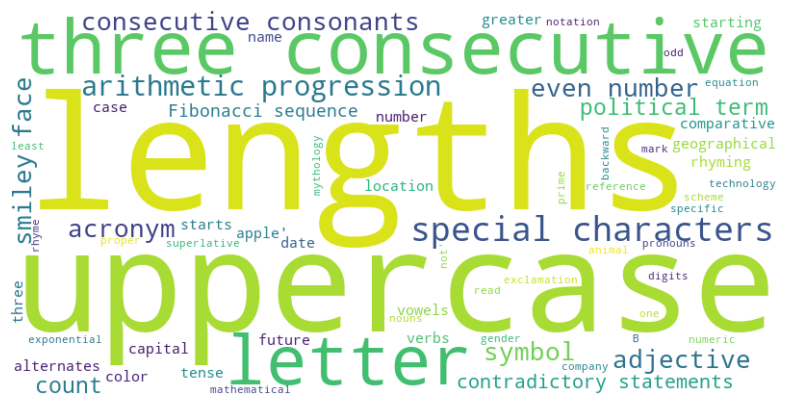

In [423]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


# Combine all statements into a single string
text = " ".join(missclassified_rule_ideas)

# Additional stopwords to ignore
additional_stopwords = set(['if', 'it', 'contains', 'a', 'the', 'and', 'is', 'as', 'an', 'or', 'and', 'of', 
                            'in', 'to', 'with', 'for', 'at', 'on', 'by', 'has', 'have', 'that', 'this', 'it', 
                            'not', 'from', 'which','all', 'are', 'was', 'if', 'AND', 'OR', 'I', 'you', 'me',
                            "word","words","mentions"])

# Generate a word cloud, excluding common stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS.union(additional_stopwords)).generate(text)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

